In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

¿Qué factores están relacionados con que los pasajeros tengan una mayor/menor probabilidad de sobrevivir? El primer paso es tener la pregunta de negocio bien clara y cargar el archivo csv para poder analizarlo. 

In [3]:
df = pd.read_csv("titanic.csv")

Se analiza qué tenemos a nivel general y se utiliza .head para mostrar en todo momento el archivo con toda la información que vamos obteniendo.

In [4]:
df.shape

(891, 12)

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Con df.info() podemos sacar qué tipo de números hay, si son floats o integer. En este caso también podemos observar que sigue habiendo 891 datos y 12 columnas, se reafirman los datos que hemos obtenido anteriormente con df.shape. Muchas veces aquí podemos comprobar si coinciden o faltan datos. 

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.set_index("customerid", inplace=True)

In [10]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Empezamos a manejar los valores nulos. En este caso, hay muchos datos inservibles en referencia a la edad y la cabina. 

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.dropna(subset=['Age'])


In [38]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

Al manejar los valores nulos de la edad y la cabina, me resulta interesante mostrar y darle prioridad a la clase social, para observar cuál de las 3 clases sociales prevalecía en el Titanic, en este caso aparece haciendo la moda, que la clase donde más pasajeros iban era en tercera clase, este dato podemos analizarlo más a fondo relacionándolo con la edad de los pasajeros y el sexo. 

In [40]:
Pclass_mode = df.Pclass.mode()[0]
Pclass_mode

3

In [41]:
df.Pclass.fillna(Pclass_mode, inplace = True)
df.Pclass.isnull().sum()


C:\Users\34651\AppData\Local\Temp\ipykernel_18560\270876965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Pclass.fillna(Pclass_mode, inplace = True)


0

In [42]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


Análisis univariado de variables categóricas

In [44]:
df.Age.value_counts()

Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [45]:
df.Age.value_counts(normalize=True)

Age
28.00    0.226712
24.00    0.033670
22.00    0.030303
18.00    0.029181
19.00    0.028058
           ...   
36.50    0.001122
55.50    0.001122
0.92     0.001122
23.50    0.001122
74.00    0.001122
Name: proportion, Length: 88, dtype: float64

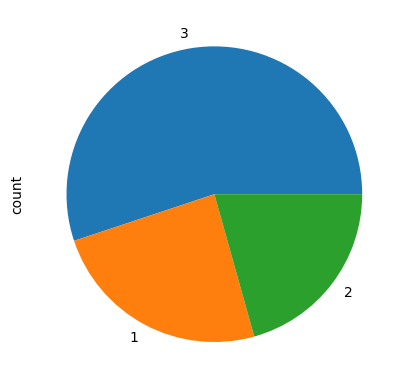

In [54]:
df.Pclass.value_counts().plot.pie()
plt.show()

En el anterior gráfico se muestran las 3 clases sociales, en este caso prevalece la tercera clase en base a las otras dos clases. Podemos ver que en esa época, los billetes eran más baratos en tercera clase y que la diferencia de dinero probablemente sería bastante notoria entre una clase u otra. 

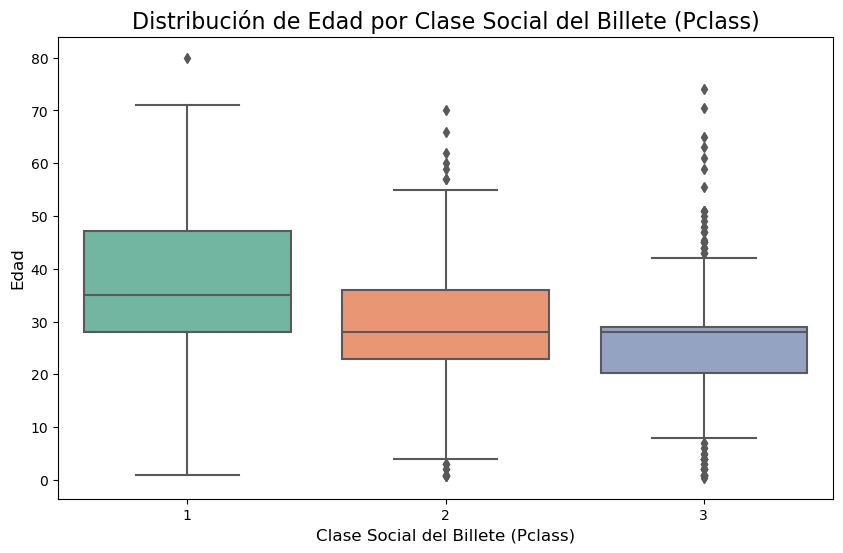

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df[['Age', 'Pclass']].dropna()

plt.figure(figsize=(10, 6))

sns.boxplot(x='Pclass', y='Age', data=df_filtered, palette="Set2")

plt.title('Distribución de Edad por Clase Social del Billete (Pclass)', fontsize=16)
plt.xlabel('Clase Social del Billete (Pclass)', fontsize=12)
plt.ylabel('Edad', fontsize=12)

plt.show()

En este caso, me resultaba interesante relacionar la edad con la clase social, ya que podemos observar que los pasajeros de primera clase tienden a ser de mayor edad en comparación con los de segunda y tercera clase.
Los de tercera clase incluyen a personas más jóvenes, como se puede ver en la mediana más baja y una mayor dispersión de edades.
En todas las clases, hay algunos valores atípicos, lo que indica que hay pasajeros cuyas edades están fuera del rango promedio esperado para su clase. En conclusión con este boxplot (que así se llama el gráfico realizado) la clase social más alta está relacionada con las personas más mayores y con mayor poder económico para la época, y la clase más baja con las personas más jóvenes y que por norma general, menor poder adquisitivo poseen. A la hora de sobrevivir sí puede influir la clase social.

C:\Users\34651\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sex', ylabel='Count'>

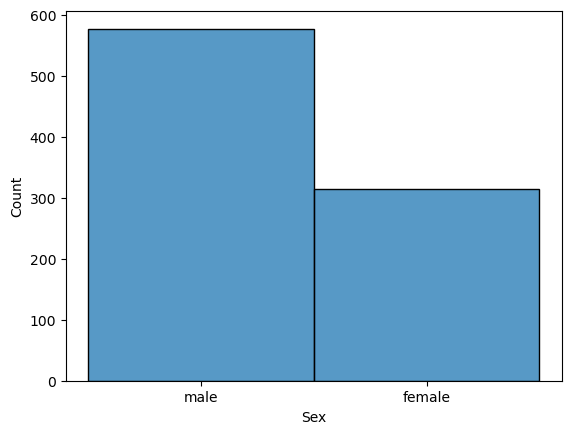

In [57]:
sns.histplot(df['Sex'])

Con el gráfico anterior, podemos observar que había más hombres que mujeres, por lo que podemos pensar que el número de hombres sobrevivientes fue mayor que el de mujeres. El número de hombres en función al número de mujeres era casi el doble. Aunque no es algo que podamos confirmar aún, dado que pueden variar otros factores a la hora de saber si influye el sexo o no en sobrevivir. 

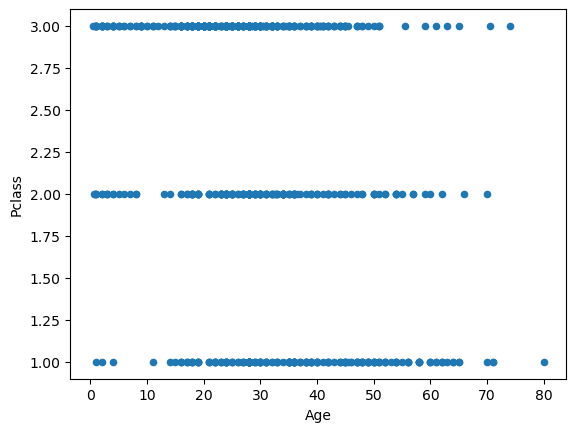

In [59]:
df.plot.scatter(x="Age",y="Pclass")
plt.show()

C:\Users\34651\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34651\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34651\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


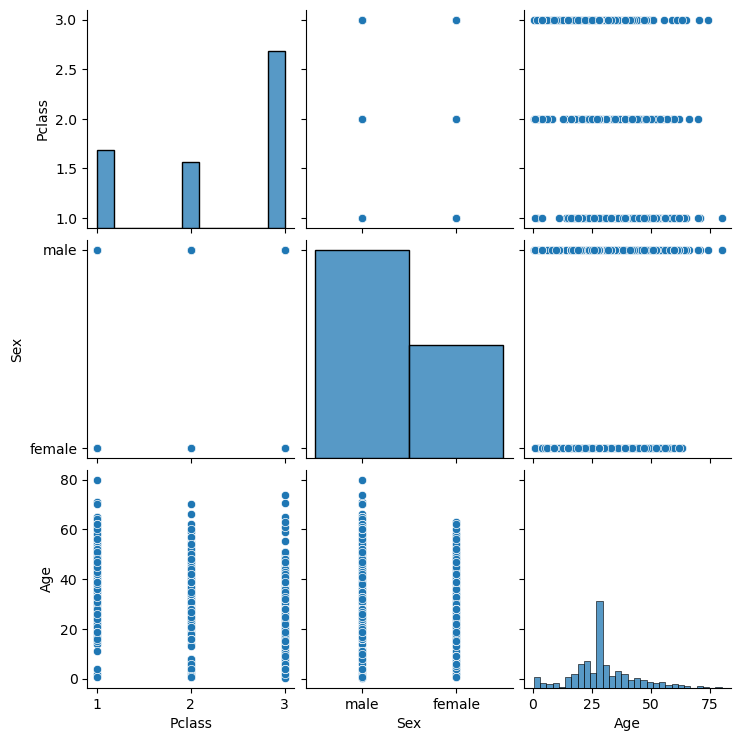

In [63]:
sns.pairplot(data = df, vars=['Pclass','Sex','Age',])
plt.show()

In [70]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


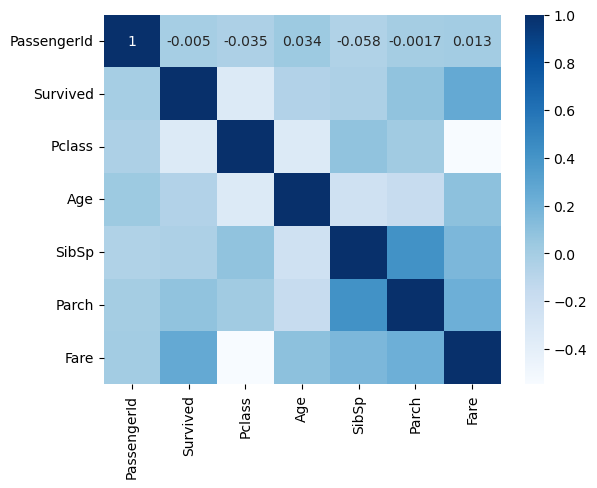

In [73]:
sns.heatmap(corr_matrix, annot=True, cmap = "Blues")
plt.show()

In [27]:
import pandas as pd

df = pd.read_csv('titanic.csv')
result = pd.pivot_table(data=df, index='Survived', columns='Sex', values='PassengerId', aggfunc='count')
result


Sex,female,male
Survived,,
0,81,468
1,233,109


En esta tabla pivotante, podemos observar que el gráfico que realizamos en base a cuánta cantidad de hombres y mujeres había en el Titanic, no obedece a que por más hombres que hubiera, sobrevivieran. En este caso, lo hemos averiguado con una tabla pivotante, que muestra el resultado de que fueron más mujeres las sobrevivientes, a pesar de que la cantidad de ellas era menor. Sólo 81 mujeres murieron en relación con los 468 hombres que lo hicieron y sobrevivieron 233 mujeres, cuando solo 109 hombres lo hicieron. 

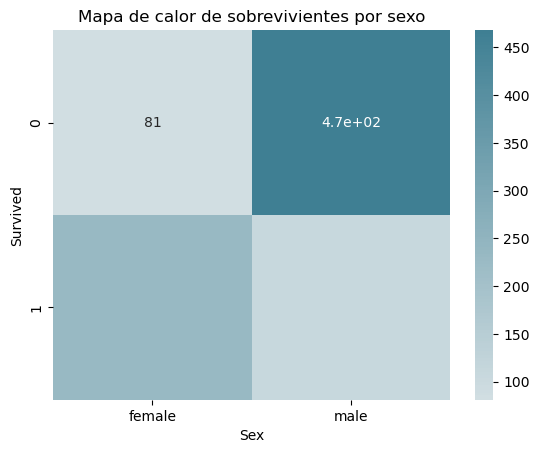

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

result = pd.pivot_table(data=df, index='Survived', columns='Sex', values='PassengerId', aggfunc='count')
sns.heatmap(result, annot=True, cmap=sns.diverging_palette(20, 220, n=256), center=0)

plt.title('Mapa de calor de sobrevivientes por sexo')
plt.show()

Otra de las conclusiones a las que podemos llegar en función del sexo y los sobrevivientes, es que la mayoría de hombres también eran trabajadores dentro del Titanic, por lo tanto, no eran pasajeros que podían acceder a salvarse tan fácilmente. Junto con la tripulación, había muchos trabajadores hombres trabajando en las máquinas del barco, zonas más difíciles para poder salir y salvarse, ya que estaban abajo del todo. Podemos también destacar que según la zona del barco donde se encontraran las personas, más fácil o difícil lo tuvieron para sobrevivir. 

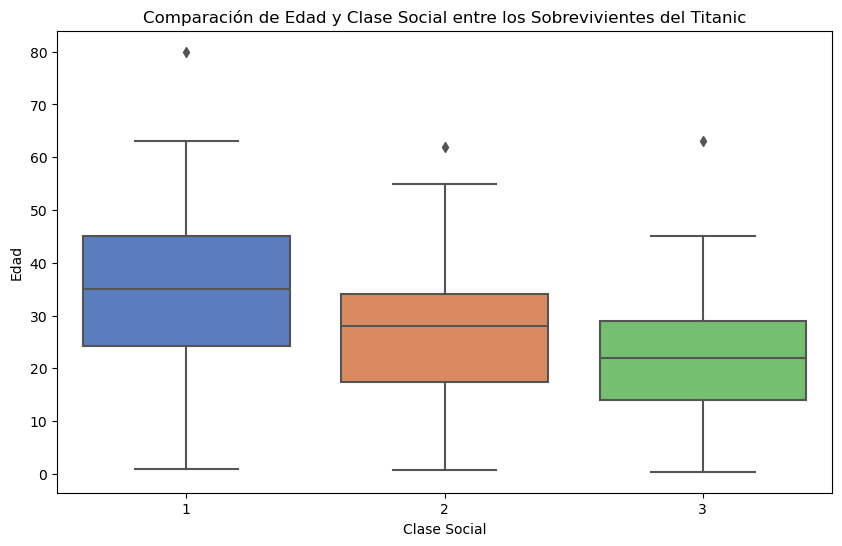

(24.0, 2)

In [12]:
titanic_data = pd.read_csv('titanic.csv')

survivors = titanic_data[titanic_data['Survived'] == 1]

plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=survivors, palette="muted")
plt.title('Comparación de Edad y Clase Social entre los Sobrevivientes del Titanic')
plt.xlabel('Clase Social')
plt.ylabel('Edad')
plt.show()

most_common_age = survivors['Age'].mode()[0]
most_common_class = survivors[survivors['Age'] == most_common_age]['Pclass'].mode()[0]

most_common_age, most_common_class



Vuelvo a realizar éste gráfico pero esta vez comparando los sobrevivientes en edad y clase social. El resultado que obtenemos es que la edad de los sobrevivientes fue de 24 años y de segunda clase. Esto se puede deber a que la segunda clase por distribución y medios, tenía más posibilidades de sobrevivir y la edad por cuestiones físicas, a menor edad, más agilidad y capacidades físicas. Mayor agilidad para el movimiento y escapar y mayor capacidad física para sobrevivir a condiciones extremas. 

A continuación vamos a realizar una regresión logística que contenga los siguientes pasos: 
-
Multiplicación por la matriz de pesos.-
Adicción del sesgo-.
Ajuste de la curva de probabilidad sigmoide.

In [17]:
import pandas as pd

titanic_df_new = pd.read_csv('titanic.csv')

titanic_df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
import numpy as np

X = titanic_df_new[['Pclass', 'Age', 'Fare']].fillna(0)  
y = titanic_df_new['Survived']  

weights = np.random.rand(X.shape[1])
bias = np.random.rand(1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.dot(X, weights) + bias

probabilities = sigmoid(z)

probabilities[:5]


array([1., 1., 1., 1., 1.])

Este array muestra la probabilidad de supervivencia para los primeros pasajeros (viendo el gráfico anterior) al salir el valor 1 es un alto porcentaje de supervivencia. Comparando clase social, edad y billete. Si comprobamos la tabla con los primeros datos, vemos que estamos en lo cierto y que como hemos estado explicando en otros puntos, las sobrevivientes fueron mujeres jóvenes. 

Como última conclusión para poder cerrar este análisis, vamos a recordar los puntos más importantes; 
-La mayoría de supervivientes son mujeres.
-Aunque el número de hombres era mayor en proporción a las mujeres, murieron más hombres. 
-La segunda clase tuvo el porcentaje mayor de sobrevivientes.
-La edad media de sobrevivientes fue de 24 años.
-Había más cantidad de pasajeros de tercera clase debido al precio, pero no fue determinante para que sobrevivieran más. 
-Las personas más mayores eran de primera clase y lo más jóvenes de segunda y tercera sobretodo. 
Se podría decir que los factores; sexo, clase social y edad son los más importantes a la hora de sobrevivir frente a la cabina o el embarque por ejemplo. 